In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

In [2]:
baboo = cv2.imread('baboo.png',cv2.IMREAD_GRAYSCALE)
butterfly = cv2.imread('butterfly.png',cv2.IMREAD_GRAYSCALE)

In [3]:
baboo.shape

(512, 512)

In [4]:
butterfly.shape

(512, 512)

### 1. Ajuste de Brilho

In [5]:
def gamma_transformation(image,gamma=1.0):
    invGamma = 1.0 / gamma
    output = np.array(((image / 255.0) ** invGamma) * 255.0).astype('uint8')
    return output

In [6]:
gamma_output_normal = gamma_transformation(baboo,1.0)
gamma_output_05 = gamma_transformation(baboo,0.5)
gamma_output_double = gamma_transformation(baboo,2.0)
gamma_output_triple = gamma_transformation(baboo,3.0)
gamma_output_02 = gamma_transformation(baboo,0.2)

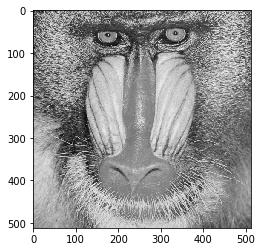

In [7]:
# gamma 1.0
plt.imshow(gamma_output_normal,cmap='gray');

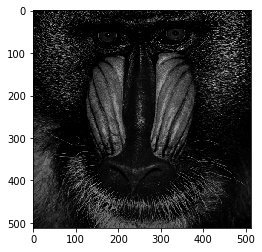

In [8]:
# gamma 0.2
plt.imshow(gamma_output_02,cmap='gray');

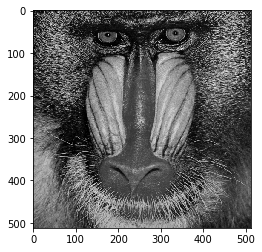

In [9]:
# gamma 0.5
plt.imshow(gamma_output_05,cmap='gray');

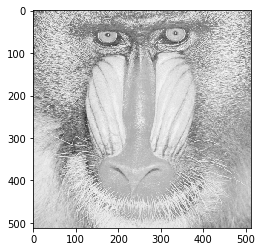

In [10]:
# gamma 2.0
plt.imshow(gamma_output_double,cmap='gray');

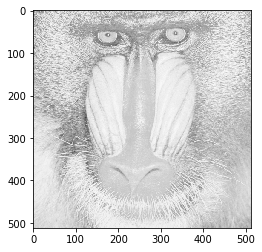

In [11]:
# gamma 3.0
plt.imshow(gamma_output_triple,cmap='gray');

### 2. Planos de Bits

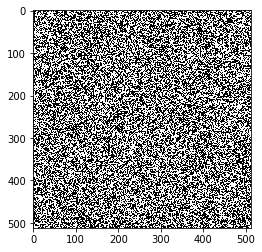

In [14]:
ims = np.mod(np.floor(baboo/math.pow(2,0)), 2)
plt.imshow(ims,cmap='gray')

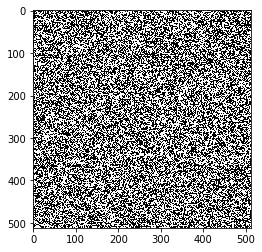

In [15]:
ims = np.mod(np.floor(baboo/math.pow(2,1)), 2)
plt.imshow(ims,cmap='gray')

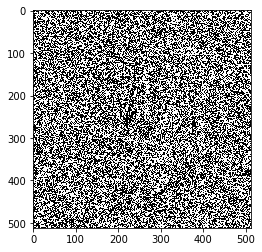

In [16]:
ims = np.mod(np.floor(baboo/math.pow(2,3)), 2)
plt.imshow(ims,cmap='gray')

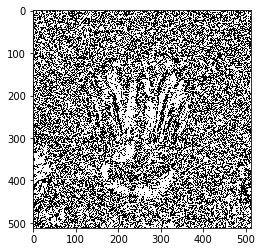

In [17]:
ims = np.mod(np.floor(baboo/math.pow(2,4)), 2)
plt.imshow(ims,cmap='gray')

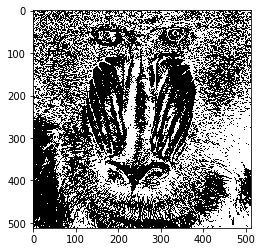

In [18]:
ims = np.mod(np.floor(baboo/math.pow(2,6)), 2)
plt.imshow(ims,cmap='gray')

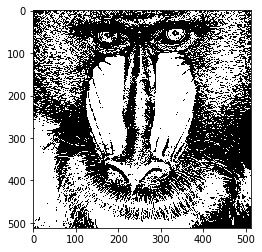

In [19]:
ims = np.mod(np.floor(baboo/math.pow(2,7)), 2)
plt.imshow(ims,cmap='gray')

### 3. Mosaico

In [20]:
dic = [5,10,12,2,7,15,0,8,11,13,1,6,3,14,9,4]

In [21]:
def piece(image,num):
    row = num // 4
    col = num % 4
    
    width = image.shape[0]
    height = image.shape[1]
    
    split_width = width / 4
    split_height = height / 4
    
    return image[int(row*split_width):int((row+1)*split_width),
                int(col*split_height):int((col+1)*split_height)]

In [22]:
def coor(num,width,height):
    row = num // 4
    col = num % 4
    
    split_width = width / 4
    split_height = height / 4
    
    return (int(row*split_width),int((row+1)*split_width),int(col*split_height),int((col+1)*split_height))

In [23]:
baboo_aux = np.zeros((512,512))

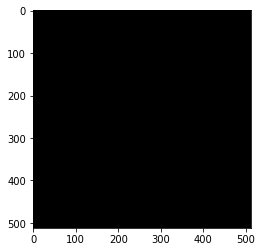

In [24]:
plt.imshow(baboo_aux,cmap='gray')

In [25]:
for i in range(0,len(dic)):
    piece_temp = piece(baboo,dic[i])
    dim = coor(i,baboo.shape[0],baboo.shape[1])
    baboo_aux[dim[0]:dim[1],dim[2]:dim[3]] = piece_temp

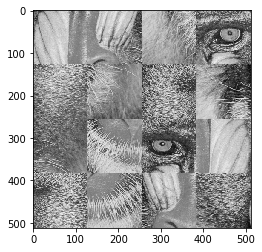

In [26]:
plt.imshow(baboo_aux,cmap='gray')

### 4. Combinação de Imagens

In [27]:
def imageCombination(image1,image2,alpha=0.5):
    invAlpha = 1.0 - alpha
    return alpha*image1 + invAlpha*image2

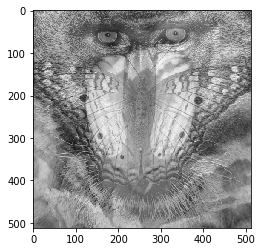

In [28]:
# alpha 0.5
output = imageCombination(baboo,butterfly)
plt.imshow(output,cmap='gray')

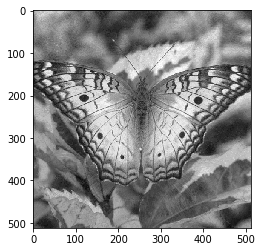

In [29]:
# alpha 0.1
output = imageCombination(baboo,butterfly,0.1)
plt.imshow(output,cmap='gray')

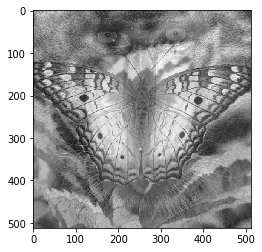

In [30]:
# alpha 0.3
output = imageCombination(baboo,butterfly,0.3)
plt.imshow(output,cmap='gray')

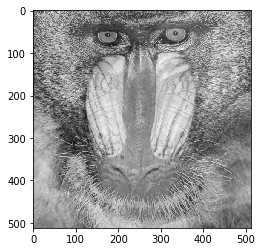

In [31]:
# alpha 0.7
output = imageCombination(baboo,butterfly,0.7)
plt.imshow(output,cmap='gray')

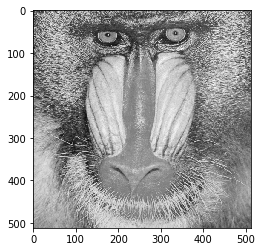

In [32]:
# alpha 0.9
output = imageCombination(baboo,butterfly,0.9)
plt.imshow(output,cmap='gray')